In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class InMemoryKG:
    def __init__(self):
        self.graph = nx.MultiDiGraph()
        self.triples = set()

    def add_relation(self, subj, pred, obj, meta=None):
        """Add a relation (triple) to the in-memory knowledge graph."""
        self.triples.add((subj, pred, obj))
        self.graph.add_edge(subj, obj, relation=pred, **(meta or {}))

    def query(self, entity):
        """Return all outgoing relations for a given entity."""
        return [(entity, data['relation'], tgt) 
                for _, tgt, data in self.graph.out_edges(entity, data=True)]

    def export_triples(self):
        """Export all stored triples as a list."""
        return list(self.triples)

    def plot(self, figsize=(8, 6), save_path=None, layout="spring"):
        """
        Visualize the knowledge graph.
        
        Args:
            figsize (tuple): Size of the plot figure.
            save_path (str): If provided, saves the plot to this file path.
                             Example: 'graph.png' or 'outputs/kg.pdf'
            layout (str): Layout type - 'spring', 'kamada_kawai', 'circular', 'shell'
        """
        plt.figure(figsize=figsize)

        # Choose layout
        if layout == "spring":
            pos = nx.spring_layout(self.graph, seed=42)
        elif layout == "kamada_kawai":
            pos = nx.kamada_kawai_layout(self.graph)
        elif layout == "circular":
            pos = nx.circular_layout(self.graph)
        elif layout == "shell":
            pos = nx.shell_layout(self.graph)
        else:
            raise ValueError(f"Unsupported layout: {layout}")

        # Draw nodes and edges
        nx.draw_networkx_nodes(self.graph, pos, node_size=2000, node_color="skyblue", edgecolors="black")
        nx.draw_networkx_edges(self.graph, pos, arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.1")
        nx.draw_networkx_labels(self.graph, pos, font_size=10, font_weight="bold")

        # Edge labels
        edge_labels = nx.get_edge_attributes(self.graph, 'relation')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_color="red", font_size=9)

        plt.title("In-Memory Knowledge Graph", fontsize=14, fontweight="bold")
        plt.axis("off")

        # Save or show
        if save_path:
            plt.savefig(save_path, bbox_inches="tight", dpi=300)
            print(f"✅ Graph saved successfully at: {save_path}")
        # else:
        #     plt.show()


✅ Graph saved successfully at: output.png


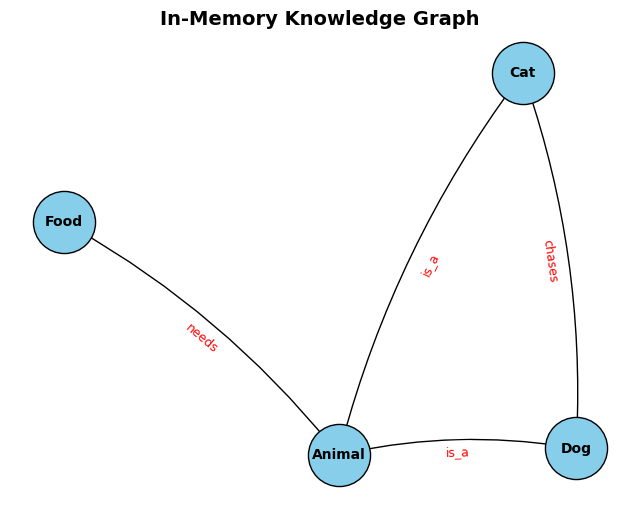

In [6]:
kg = InMemoryKG()
kg.add_relation("Cat", "is_a", "Animal")
kg.add_relation("Dog", "is_a", "Animal")
kg.add_relation("Animal", "needs", "Food")
kg.add_relation("Dog", "chases", "Cat")

kg.plot(save_path='output.png')
